# Extract Data from SEC

In [1]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 8.4 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 4.2 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 610.4 kB/s eta 0:00:00 MB/s eta 0:00:01


In [2]:
!pip install webdriver_manager

In [ ]:
#!wget -O /tmp/chromedriver.zip https://chromedriver.storage.googleapis.com/92.0.4515.107/chromedriver_linux64.zip && sudo unzip /tmp/chromedriver.zip chromedriver -d /home/dada/

In [18]:
#!sudo rm /usr/bin/chromedriver
#!sudo ln -s /home/dada/chromedriver /usr/bin/chromedriver

In [ ]:
#nano ~/.bashrc
#add line: export PATH="$/home/dada/:$PATH" 
#source .bashrc
#echo $PATH

In [16]:
import pandas as pd
pd.set_option("display.max.columns", None)
import numpy as np
import time, sys, os, re
from datetime import date

import datetime, pickle
import getpass
from tqdm import tqdm
import datetime
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
import csv
import time
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import os 
from bs4 import BeautifulSoup 
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.common.exceptions import StaleElementReferenceException

In [96]:
#comp = pd.read_excel('LIST OF PUBLICLY TRADED US COMPANIES (7).xlsx')
comp = pd.read_excel('MA_new.xls', skiprows = 7)

In [97]:
print(comp.shape)

(1870, 41)


In [98]:
comp = comp[comp['Exchange:Ticker'] != "-"]

In [99]:
comp["Exchange"] = [i.split(":")[0] for i in comp['Exchange:Ticker']]
comp["Ticker"] = [i.split(":")[1] for i in comp['Exchange:Ticker']]

In [100]:
comp = comp[comp.Exchange.isin(['NYSE', 'NasdaqGS','NasdaqCM','NasdaqGM', 'NYSEAM'])]

In [101]:
comp.shape

(1629, 43)

In [102]:
comp.Exchange.value_counts()

NYSE        625
NasdaqGS    437
NasdaqCM    317
NasdaqGM    162
NYSEAM       88
Name: Exchange, dtype: int64

In [103]:
comp.columns

Index(['All Transactions Announced Date', 'Target/Issuer', 'Exchange:Ticker',
       'CIK [Target/Issuer]', 'Security Tickers [Target/Issuer]',
       'Issue Exchange:Ticker', 'Transaction Types', 'M&A Announced Date',
       'M&A Announced Date (Including Bids and Letters of Intent)',
       'Transaction Status',
       'Total Transaction Value ($USDmm, Historical rate)', 'Buyers/Investors',
       'Sellers', 'CIQ Transaction ID', 'Target Security Types',
       'Majority / Minority Stakes', 'Transaction Primary Features',
       'All Transactions Announced Date (Including Bids and Letters of Intent)',
       'All Transactions Closed Date', 'All Transactions Cancelled Date',
       'Change of Control', 'Related Transactions',
       'M&A Letter of Intent Date', 'Public Offerings Offer Date',
       'Target/Issuer LTM Financials - Total Revenue (at Announcement) ($USDmm, Historical rate)',
       'Target/Issuer LTM Financials - Earnings from Continuing Ops (at Announcement) ($USDmm, Hi

In [104]:
comp.columns = ['All_Trans_Anno_Date', 'Target', 'Exchange:Ticker',
       'CIK', 'Ticker_Tgt','Tgt_Exch_Ticker', 'Trans_Type', 'MA_Anno_Date',
       'MA_Anno_Date_Bid_LoI', 'Trans__Status',
       'Tot_Trans_Val', 'Buyer', 'Seller', 'CIQ', 'Target_Sec_Type',
       'Maj_Min_Stake', 'Trans_Pri_Feat', 'Trans_Anno_Date_Bid_LoI',
       'Trans_Closed_Date', 'Trans_Cancelled_Date', 'Change_Ctl', 'Rel_Trans',
       'MA_LoI_Date', 'IPO_Date', 'Tgt_Tot_Rev', 'Tgt_Earn', 'Tgt_Tot_Assets',
       'Tgt_Tot_Comm_Eqt','Tgt_Min_Int', 'Tgt_Mkt_Cap', 'Tgt_Geo_Reg',
       'Tgt_HQ',  'Tgt_parent_HQ', 'Tgt_Geo_Loc', 'Tgt_Comp_Type', 'Acq_Mkt',
       'Tgt_Ind_Cls','Tgt_Prim_Sect', 'Tgt_Prim_Exchange', 
       'Tgt_second_Exchange','Tgt_1st_Trade_Dt', 'Exchange', 'Ticker']

In [105]:
#limit MA free companies to listed in NASDAQ and  NYSE
comp.Tgt_Prim_Sect.value_counts()

Financials                314
Information Technology    254
Consumer Discretionary    237
Health Care               231
Industrials               215
Communication Services    130
Energy                     90
Consumer Staples           62
Materials                  48
Utilities                  34
Real Estate                14
Name: Tgt_Prim_Sect, dtype: int64

In [106]:
pd.set_option('display.max_columns', None)

In [107]:
comp.head()

,All_Trans_Anno_Date,Target,Exchange:Ticker,CIK,Ticker_Tgt,Tgt_Exch_Ticker,Trans_Type,MA_Anno_Date,MA_Anno_Date_Bid_LoI,Trans__Status,Tot_Trans_Val,Buyer,Seller,CIQ,Target_Sec_Type,Maj_Min_Stake,Trans_Pri_Feat,Trans_Anno_Date_Bid_LoI,Trans_Closed_Date,Trans_Cancelled_Date,Change_Ctl,Rel_Trans,MA_LoI_Date,IPO_Date,Tgt_Tot_Rev,Tgt_Earn,Tgt_Tot_Assets,Tgt_Tot_Comm_Eqt,Tgt_Min_Int,Tgt_Mkt_Cap,Tgt_Geo_Reg,Tgt_HQ,Tgt_parent_HQ,Tgt_Geo_Loc,Tgt_Comp_Type,Acq_Mkt,Tgt_Ind_Cls,Tgt_Prim_Sect,Tgt_Prim_Exchange,Tgt_second_Exchange,Tgt_1st_Trade_Dt,Exchange,Ticker
0,2022-11-21,"Imago BioSciences, Inc. (NasdaqGS:IMGO)",NasdaqGS:IMGO,0001623715,NasdaqGS:IMGO,-,Merger/Acquisition,2022-11-21,2022-11-19,Announced,1345.07,Merck Sharp & Dohme Corp.,Frazier Healthcare Partners; Greenspring Assoc...,IQTR1815821699,Common Equity; Rights / Warrants / Options,Majority,Acquisition of Equity Stake,2022-11-19,-,-,Yes,-,-,-,-,-,-,-,-,588.51,United States and Canada,United States,United States (Merck Sharp & Dohme Corp.),United States and Canada (Primary); United Sta...,Public Company,-,Biotechnology (Primary); Biotechnology (Primar...,Health Care,"NasdaqGS:IMGO\nCompany: Imago BioSciences, Inc...",-,"NasdaqGS:IMGO\nCompany: Imago BioSciences, Inc...",NasdaqGS,IMGO
1,2022-11-21,"Industrial Tech Acquisitions II, Inc. (NasdaqG...",NasdaqGM:ITAQ,0001841586,NasdaqGM:ITAQ.U; NasdaqGM:ITAQ,-,Merger/Acquisition,2022-11-21,2022-11-21,Announced,450,"NEXT Renewable Fuels, Inc.","Industrial Tech Partners II, LLC",IQTR1815827761,Common Equity,Majority,Acquisition of Equity Stake,2022-11-21,-,-,Yes,01/22/2021 Private Placement - Initial Invest...,-,-,-,4.03,177.96,-6.89,-,217.57,United States and Canada,United States,"United States (NEXT Renewable Fuels, Inc.)",United States and Canada (Primary); United Sta...,Public Company,-,Asset Management and Custody Banks (Primary); ...,Financials,NasdaqGM:ITAQ\nCompany: Industrial Tech Acquis...,NasdaqGM:ITAQ.U\nCompany: Industrial Tech Acqu...,NasdaqGM:ITAQ\nCompany: Industrial Tech Acquis...,NasdaqGM,ITAQ
2,2022-11-17,Goal Acquisitions Corp. (NasdaqCM:PUCK),NasdaqCM:PUCK,0001836100,NasdaqCM:PUCK.U; NasdaqCM:PUCK,-,Merger/Acquisition,2022-11-17,2022-11-17,Announced,512.56,Digital Virgo SAS,Goal Acquisitions Sponsor LLC,IQTR1815498420,Common Equity,Majority,Acquisition of Equity Stake,2022-11-17,-,-,Yes,-,-,-,-,-0.014,260.25,-1.06,-,329.29,United States and Canada,United States,France (Digital Virgo SAS),United States and Canada (Primary); United Sta...,Public Company,-,Asset Management and Custody Banks (Primary); ...,Financials,NasdaqCM:PUCK\nCompany: Goal Acquisitions Corp...,NasdaqCM:PUCK.U\nCompany: Goal Acquisitions Co...,NasdaqCM:PUCK\nCompany: Goal Acquisitions Corp...,NasdaqCM,PUCK
3,2022-11-17,Willis Lease Finance Corporation (NasdaqGM:WLFC),NasdaqGM:WLFC,0001018164,DB:WIJ; NasdaqGM:WLFC,-,Merger/Acquisition,2022-11-17,2022-11-17,Announced,29.29,"Mitsui & Co., Ltd. (TSE:8031); Fuyo General Le...","Development Bank of Japan Inc., Investment Arm",IQTR1815562180,Common Equity,Minority,Acquisition of Equity Stake,2022-11-17,-,-,No,09/22/2017 Private Placement - Initial Invest...,-,-,293.02,-7.16,2541.97,389.41,-,257.9,United States and Canada,United States,"Japan (Mitsui & Co., Ltd. (TSE:8031)); Japan (...",United States and Canada (Primary); United Sta...,Public Company,-,Capital Goods (Primary); Industrials (Primary)...,Industrials,NasdaqGM:WLFC\nCompany: Willis Lease Finance C...,-,NasdaqGM:WLFC\nCompany: Willis Lease Finance C...,NasdaqGM,WLFC
4,2022-11-17,Diffusion Pharmaceuticals Inc. (NasdaqCM:DFFN),NasdaqCM:DFFN,0001171623; 0001053691,DB:DP80; BST:DP81; NasdaqCM:DFFN,-,Merger/Acquisition,2022-11-17,2022-10-17,Cancelled,-,-,-,IQTR1815655077,Common Equity,Majority,Acquisition of Equity Stake,2022-10-17,-,2022-10-25 00:00:00,Yes,-,-,-,-,-24.39,29.18,26.67,-,12.6,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Biotechnology (Primary); Biotechnology (Primar...,He

In [108]:
comp['Year'] = [i.year for i in comp.MA_Anno_Date]

<AxesSubplot:>

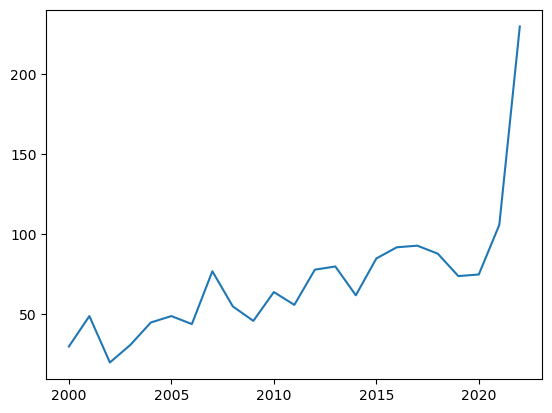

In [109]:
comp.Year.value_counts().sort_index().plot()

In [110]:
print(f"The unique target number is {len(comp.Ticker.unique())}")
print(f"The total target number is {len(comp.Ticker)}")

The unique target number is 1126
The total target number is 1629


In [191]:
comp.head()

,All_Trans_Anno_Date,Target,Exchange:Ticker,CIK,Ticker_Tgt,Tgt_Exch_Ticker,Trans_Type,MA_Anno_Date,MA_Anno_Date_Bid_LoI,Trans__Status,Tot_Trans_Val,Buyer,Seller,CIQ,Target_Sec_Type,Maj_Min_Stake,Trans_Pri_Feat,Trans_Anno_Date_Bid_LoI,Trans_Closed_Date,Trans_Cancelled_Date,Change_Ctl,Rel_Trans,MA_LoI_Date,IPO_Date,Tgt_Tot_Rev,Tgt_Earn,Tgt_Tot_Assets,Tgt_Tot_Comm_Eqt,Tgt_Min_Int,Tgt_Mkt_Cap,Tgt_Geo_Reg,Tgt_HQ,Tgt_parent_HQ,Tgt_Geo_Loc,Tgt_Comp_Type,Acq_Mkt,Tgt_Ind_Cls,Tgt_Prim_Sect,Tgt_Prim_Exchange,Tgt_second_Exchange,Tgt_1st_Trade_Dt,Exchange,Ticker,Year,CIK_0,CIK_1
0,2022-11-21,"Imago BioSciences, Inc. (NasdaqGS:IMGO)",NasdaqGS:IMGO,0001623715,NasdaqGS:IMGO,-,Merger/Acquisition,2022-11-21,2022-11-19,Announced,1345.07,Merck Sharp & Dohme Corp.,Frazier Healthcare Partners; Greenspring Assoc...,IQTR1815821699,Common Equity; Rights / Warrants / Options,Majority,Acquisition of Equity Stake,2022-11-19,-,-,Yes,-,-,-,-,-,-,-,-,588.51,United States and Canada,United States,United States (Merck Sharp & Dohme Corp.),United States and Canada (Primary); United Sta...,Public Company,-,Biotechnology (Primary); Biotechnology (Primar...,Health Care,"NasdaqGS:IMGO\nCompany: Imago BioSciences, Inc...",-,"NasdaqGS:IMGO\nCompany: Imago BioSciences, Inc...",NasdaqGS,IMGO,2022,0001623715,0001623715
1,2022-11-21,"Industrial Tech Acquisitions II, Inc. (NasdaqG...",NasdaqGM:ITAQ,0001841586,NasdaqGM:ITAQ.U; NasdaqGM:ITAQ,-,Merger/Acquisition,2022-11-21,2022-11-21,Announced,450,"NEXT Renewable Fuels, Inc.","Industrial Tech Partners II, LLC",IQTR1815827761,Common Equity,Majority,Acquisition of Equity Stake,2022-11-21,-,-,Yes,01/22/2021 Private Placement - Initial Invest...,-,-,-,4.03,177.96,-6.89,-,217.57,United States and Canada,United States,"United States (NEXT Renewable Fuels, Inc.)",United States and Canada (Primary); United Sta...,Public Company,-,Asset Management and Custody Banks (Primary); ...,Financials,NasdaqGM:ITAQ\nCompany: Industrial Tech Acquis...,NasdaqGM:ITAQ.U\nCompany: Industrial Tech Acqu...,NasdaqGM:ITAQ\nCompany: Industrial Tech Acquis...,NasdaqGM,ITAQ,2022,0001841586,0001841586
2,2022-11-17,Goal Acquisitions Corp. (NasdaqCM:PUCK),NasdaqCM:PUCK,0001836100,NasdaqCM:PUCK.U; NasdaqCM:PUCK,-,Merger/Acquisition,2022-11-17,2022-11-17,Announced,512.56,Digital Virgo SAS,Goal Acquisitions Sponsor LLC,IQTR1815498420,Common Equity,Majority,Acquisition of Equity Stake,2022-11-17,-,-,Yes,-,-,-,-,-0.014,260.25,-1.06,-,329.29,United States and Canada,United States,France (Digital Virgo SAS),United States and Canada (Primary); United Sta...,Public Company,-,Asset Management and Custody Banks (Primary); ...,Financials,NasdaqCM:PUCK\nCompany: Goal Acquisitions Corp...,NasdaqCM:PUCK.U\nCompany: Goal Acquisitions Co...,NasdaqCM:PUCK\nCompany: Goal Acquisitions Corp...,NasdaqCM,PUCK,2022,0001836100,0001836100
3,2022-11-17,Willis Lease Finance Corporation (NasdaqGM:WLFC),NasdaqGM:WLFC,0001018164,DB:WIJ; NasdaqGM:WLFC,-,Merger/Acquisition,2022-11-17,2022-11-17,Announced,29.29,"Mitsui & Co., Ltd. (TSE:8031); Fuyo General Le...","Development Bank of Japan Inc., Investment Arm",IQTR1815562180,Common Equity,Minority,Acquisition of Equity Stake,2022-11-17,-,-,No,09/22/2017 Private Placement - Initial Invest...,-,-,293.02,-7.16,2541.97,389.41,-,257.9,United States and Canada,United States,"Japan (Mitsui & Co., Ltd. (TSE:8031)); Japan (...",United States and Canada (Primary); United Sta...,Public Company,-,Capital Goods (Primary); Industrials (Primary)...,Industrials,NasdaqGM:WLFC\nCompany: Willis Lease Finance C...,-,NasdaqGM:WLFC\nCompany: Willis Lease Finance C...,NasdaqGM,WLFC,2022,0001018164,0001018164
4,2022-11-17,Diffusion Pharmaceuticals Inc. (NasdaqCM:DFFN),NasdaqCM:DFFN,0001171623; 0001053691,DB:DP80; BST:DP81; NasdaqCM:DFFN,-,Merger/Acquisition,2022-11-17,2022-10-17,Cancelled,-,-,-,IQTR1815655077,Common Equity,Majority,Acquisition of Equity Stake,2022-10-17,-,2022-10-25 00:00:00,Yes,-,-,-,-,-24.39,29.18,26.67,-,12.6,United States and Canada,United Sta

# if a company is the announced target of multiple M&A, pick the first announce 

In [121]:
def splitCIK(df):
    
    CIK_0 = []
    CIK_1 = []

    for i in df.CIK:
        cik_i = i.split("; ")
        if len(cik_i) > 1:
            CIK_0.append(cik_i[0])
            CIK_1.append(cik_i[1].lstrip())
        else:
            CIK_0.append(cik_i[0])
            CIK_1.append(cik_i[0])
    return CIK_0, CIK_1

In [122]:
comp['CIK_0'], comp['CIK_1'] = splitCIK(comp)

In [123]:
#group announcement by Symbol and Year
comp_sub = comp.sort_values('MA_Anno_Date').groupby(['Ticker']).first().reset_index()

In [124]:
print(comp_sub.shape)
comp_sub.tail()

(1126, 46)


,Ticker,All_Trans_Anno_Date,Target,Exchange:Ticker,CIK,Ticker_Tgt,Tgt_Exch_Ticker,Trans_Type,MA_Anno_Date,MA_Anno_Date_Bid_LoI,Trans__Status,Tot_Trans_Val,Buyer,Seller,CIQ,Target_Sec_Type,Maj_Min_Stake,Trans_Pri_Feat,Trans_Anno_Date_Bid_LoI,Trans_Closed_Date,Trans_Cancelled_Date,Change_Ctl,Rel_Trans,MA_LoI_Date,IPO_Date,Tgt_Tot_Rev,Tgt_Earn,Tgt_Tot_Assets,Tgt_Tot_Comm_Eqt,Tgt_Min_Int,Tgt_Mkt_Cap,Tgt_Geo_Reg,Tgt_HQ,Tgt_parent_HQ,Tgt_Geo_Loc,Tgt_Comp_Type,Acq_Mkt,Tgt_Ind_Cls,Tgt_Prim_Sect,Tgt_Prim_Exchange,Tgt_second_Exchange,Tgt_1st_Trade_Dt,Exchange,Year,CIK_0,CIK_1
1121,ZG,2013-09-03,"Zillow Group, Inc. (NasdaqGS:ZG)",NasdaqGS:ZG,0001617640,BMV:Z *; BOVESPA:Z2LL34; BOVESPA:Z2LL35; DB:0Z...,-,Merger/Acquisition,2013-09-03,2013-08-23,Closed,-,Cavalane Holdings Pty Limited,-,IQTR245801319,Common Equity,Minority,Acquisition of Equity Stake,2013-08-23,2013-08-23 00:00:00,-,No,-,-,-,152.14,-11.1,317.53,291.62,-,3621.75,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Real Estate (Primary); Real Estate (Primary); ...,Real Estate,"NasdaqGS:ZG\nCompany: Zillow Group, Inc.\n(IQT...","NasdaqGS:Z\nCompany: Zillow Group, Inc.\n(IQT3...","NasdaqGS:ZG\nCompany: Zillow Group, Inc.\n(IQT...",NasdaqGS,2013,0001617640,0001617640
1122,ZTS,2014-11-11,Zoetis Inc. (NYSE:ZTS),NYSE:ZTS,0001555280,BMV:ZTS *; BOVESPA:Z1TS34; BRSE:ZTS; BUL:ZOE; ...,-,Merger/Acquisition,2014-11-11,2014-11-03,Closed,181.58,"Pershing Square Capital Management, L.P.; Pers...",-,IQTR276706598,Common Equity,Minority,Acquisition of Equity Stake,2014-11-03,2014-11-03 00:00:00,-,No,-,-,-,4719,565,6527,1364,25,20133.21,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Health Care (Primary); Pharmaceuticals (Primar...,Health Care,NYSE:ZTS\nCompany: Zoetis Inc.\n(IQT226099795)...,-,NYSE:ZTS\nCompany: Zoetis Inc.\n(IQT226099795)...,NYSE,2014,0001555280,0001555280
1123,ZUMZ,2001-11-30,Zumiez Inc. (NasdaqGS:ZUMZ),NasdaqGS:ZUMZ,0001318008,DB:ZM3; NasdaqGS:ZUMZ,-,Merger/Acquisition,2001-11-30,2001-11-30,Effective,-,"Brentwood Associates, Inc.",-,IQTR3659168,Common Equity,Majority,Acquisition of Equity Stake,2001-11-30,-,-,Yes,-,-,-,-,-,-,-,-,-,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Apparel Retail (Primary); Consumer Discretiona...,Consumer Discretionary,NasdaqGS:ZUMZ\nCompany: Zumiez Inc.\n(IQT22270...,-,NasdaqGS:ZUMZ\nCompany: Zumiez Inc.\n(IQT22270...,NasdaqGS,2001,0001318008,0001318008
1124,ZYME,2022-04-28,Zymeworks Inc. (NYSE:ZYME),NYSE:ZYME,0001937653; 0001403752,DB:ZA8; NYSE:ZYME,-,Merger/Acquisition,2022-04-28,2022-04-28,Cancelled,599.35,All Blue Falcons FZE,BDC Capital Inc.; Lumira Ventures; Fonds de so...,IQTR1780955833,Common Equity,Majority,Acquisition of Equity Stake,2022-04-28,-,2022-05-20 00:00:00,Yes,01/07/2016 Private Placement - Initial Invest...,-,-,27.95,-239.88,429.98,282.44,-,280.6,United States and Canada,Canada,-,United States and Canada (Primary); United Sta...,Public Company,-,Biotechnology (Primary); Biotechnology (Primar...,Health Care,NYSE:ZYME\nCompany: Zymeworks Inc.\n(IQT428079...,-,NYSE:ZYME\nCompany: Zymeworks Inc.\n(IQT428079...,NYSE,2022,0001937653,0001403752
1125,ZYNE,2014-10-02,"Zynerba Pharmaceuticals, Inc. (NasdaqGM:ZYNE)",NasdaqGM:ZYNE,0001621443,DB:6ZY; LSE:0M40; NasdaqGM:ZYNE,-,Merger/Acquisition,2014-10-02,2014-10-02,Effective,-,"Broadband Capital Management LLC, Investment Arm",-,IQTR274084166,Common Equity,Majority,Acquisition of Equity Stake,2014-10-02,-,-,Yes,-,-,-,0.828,-4.51,6.01,-6.65,-,-,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Health Care (Primary); Pharmaceutical Products...,Health Care,NasdaqGM:ZYNE\nCompany: Zynerba Pharmaceutical...,-,NasdaqGM:ZYNE\nCompany: Zynerba Pharmaceutical...,NasdaqGM,2014,0001621443,0001621443


In [125]:
comp_sub['Tgt_Ind_Cls'] = [i.split(";")[0] for i in comp_sub['Tgt_Ind_Cls']]

In [126]:
comp_sub['Tgt_Prim_Sect'].value_counts()

Financials                260
Information Technology    167
Health Care               163
Consumer Discretionary    156
Industrials               140
Communication Services     68
Energy                     66
Consumer Staples           42
Materials                  30
Utilities                  25
Real Estate                 9
Name: Tgt_Prim_Sect, dtype: int64

In [127]:
pickle.dump(comp_sub, open('comp_sub_0.pkl', 'wb'))

In [128]:
comp_sub = pickle.load(open('comp_sub_0.pkl', 'rb'))

In [192]:
comp_sub['Tgt_Mkt_Cap'] = np.where(comp_sub.Tgt_Mkt_Cap == "-",  comp_sub.Tot_Trans_Val, comp_sub.Tgt_Mkt_Cap)

In [194]:
comp_sub.shape

(1126, 46)

In [193]:
sum(comp_sub['Tgt_Mkt_Cap'] == "-")

140

In [196]:
comp_sub0 = comp_sub[comp_sub.CIK_0 != comp_sub.CIK_1]

In [197]:
comp_sub0.shape

(164, 46)

# Non-M&A Company

In [142]:
non_ma = pd.read_excel('Company_non_ma.xls', skiprows = 7)       

In [143]:
print(non_ma.shape)
non_ma.head()

(6746, 9)


,Company Name,Exchange:Ticker,Exchanges [Primary Listing],Exchanges [Secondary Listings],Industry Classifications,First Trade Date [Primary Listing],"Market Capitalization [My Setting] [11/23/2022] ($USDmm, Historical rate)",Most Recent Trade Date [Primary Listing],CIK
0,Apple Inc. (NasdaqGS:AAPL),NasdaqGS:AAPL,Nasdaq Global Select (NasdaqGS),-,Information Technology (Primary),1982-10-04,2403239.4,2022-11-23,0000320193
1,Microsoft Corporation (NasdaqGS:MSFT),NasdaqGS:MSFT,Nasdaq Global Select (NasdaqGS),-,Information Technology (Primary),1986-03-13,1845578.5,2022-11-23,0000789019
2,Alphabet Inc. (NasdaqGS:GOOGL),NasdaqGS:GOOGL,Nasdaq Global Select (NasdaqGS),NasdaqGS:GOOG\nCompany: Alphabet Inc.\n(IQT260...,Communication Services (Primary),2004-08-19,1276558.7,2022-11-23,0001652044
3,"Amazon.com, Inc. (NasdaqGS:AMZN)",NasdaqGS:AMZN,Nasdaq Global Select (NasdaqGS),-,Consumer Discretionary (Primary),1997-05-15,960281.7,2022-11-23,0001018724
4,Berkshire Hathaway Inc. (NYSE:BRK.A),NYSE:BRK.A,New York Stock Exchange (NYSE),NYSE:BRK.B\nCompany: Berkshire Hathaway Inc.\n...,Financials (Primary),1985-04-16,696358.4,2022-11-23,0001067983


In [144]:
non_ma = non_ma[non_ma['Exchange:Ticker'] != "-"]

In [145]:
non_ma['Exchage'] = [i.split(":")[0] for i in non_ma['Exchange:Ticker']]
non_ma['Ticker'] = [i.split(":")[1] for i in non_ma['Exchange:Ticker']]

In [146]:
non_ma["CIK_0"], non_ma["CIK_1"] = splitCIK(non_ma)

In [147]:
non_ma["First_Trade_Year"] = [i.year for i in non_ma['First Trade Date [Primary Listing]']]

In [148]:
non_ma["Last_Trade_Year"] = [i.year for i in non_ma['Most Recent Trade Date [Primary Listing]']]

In [149]:
print(non_ma.shape)
non_ma.columns

(6746, 15)


Index(['Company Name', 'Exchange:Ticker', 'Exchanges [Primary Listing]',
       'Exchanges [Secondary Listings]', 'Industry Classifications',
       'First Trade Date [Primary Listing]',
       'Market Capitalization [My Setting] [11/23/2022] ($USDmm, Historical rate)',
       'Most Recent Trade Date [Primary Listing]', 'CIK', 'Exchage', 'Ticker',
       'CIK_0', 'CIK_1', 'First_Trade_Year', 'Last_Trade_Year'],
      dtype='object')

In [150]:
non_ma.drop(['Exchanges [Primary Listing]', 'Most Recent Trade Date [Primary Listing]', 
             'Exchange:Ticker','Exchanges [Secondary Listings]',
             'First Trade Date [Primary Listing]', "CIK"], axis = 1, inplace = True)

In [151]:
non_ma.columns

Index(['Company Name', 'Industry Classifications',
       'Market Capitalization [My Setting] [11/23/2022] ($USDmm, Historical rate)',
       'Exchage', 'Ticker', 'CIK_0', 'CIK_1', 'First_Trade_Year',
       'Last_Trade_Year'],
      dtype='object')

In [152]:
non_ma.columns  = ['Company_Name', 'Industry_Cls', 'Mkt_Cap','Exchage', 'Ticker',"CIK_0",  "CIK_1", 'First_Trade_Year','Last_Trade_Year']

In [153]:
len([i for i in ma_trn.Ticker if i not in non_ma.Ticker])

550

In [154]:
non_ma['Industry_Cls'] = [i.split(";")[0] for i in non_ma['Industry_Cls']]
non_ma['Industry_Cls'] = [i.split(" (")[0] for i in non_ma['Industry_Cls']]

In [155]:
non_ma['Industry_Cls'].value_counts()

Financials                2318
Health Care               1243
Information Technology     732
Industrials                652
Consumer Discretionary     558
Materials                  262
Energy                     241
Communication Services     234
Real Estate                217
Consumer Staples           199
Utilities                   90
Name: Industry_Cls, dtype: int64

In [156]:
pickle.dump(non_ma, open('non_ma.pkl', 'wb'))

In [2]:
non_ma = pickle.load(open('non_ma.pkl', 'rb'))

In [158]:
print(non_ma.shape)
non_ma.head()

(6746, 9)


,Company_Name,Industry_Cls,Mkt_Cap,Exchage,Ticker,CIK_0,CIK_1,First_Trade_Year,Last_Trade_Year
0,Apple Inc. (NasdaqGS:AAPL),Information Technology,2403239.4,NasdaqGS,AAPL,0000320193,0000320193,1982,2022
1,Microsoft Corporation (NasdaqGS:MSFT),Information Technology,1845578.5,NasdaqGS,MSFT,0000789019,0000789019,1986,2022
2,Alphabet Inc. (NasdaqGS:GOOGL),Communication Services,1276558.7,NasdaqGS,GOOGL,0001652044,0001652044,2004,2022
3,"Amazon.com, Inc. (NasdaqGS:AMZN)",Consumer Discretionary,960281.7,NasdaqGS,AMZN,0001018724,0001018724,1997,2022
4,Berkshire Hathaway Inc. (NYSE:BRK.A),Financials,696358.4,NYSE,BRK.A,0001067983,0001067983,1985,2022


# Create training set

In [6]:
ma_trn = pickle.load(open('ma_trn.pkl', 'rb'))

In [14]:
pd.set_option("display.max.columns", None)

In [15]:
ma_trn.head()

,Ticker,All_Trans_Anno_Date,Target,Exchange:Ticker,Ticker_Tgt,Tgt_Exch_Ticker,Trans_Type,MA_Anno_Date,MA_Anno_Date_Bid_LoI,Trans__Status,Tot_Trans_Val,Buyer,Seller,CIQ,Target_Sec_Type,Maj_Min_Stake,Trans_Pri_Feat,Trans_Anno_Date_Bid_LoI,Trans_Closed_Date,Trans_Cancelled_Date,Change_Ctl,Rel_Trans,MA_LoI_Date,IPO_Date,Tgt_Tot_Rev,Tgt_Earn,Tgt_Tot_Assets,Tgt_Tot_Comm_Eqt,Tgt_Min_Int,Tgt_Mkt_Cap,Tgt_Geo_Reg,Tgt_HQ,Tgt_parent_HQ,Tgt_Geo_Loc,Tgt_Comp_Type,Acq_Mkt,Tgt_Ind_Cls,Tgt_Prim_Sect,Tgt_Prim_Exchange,Tgt_second_Exchange,Tgt_1st_Trade_Dt,Exchange,Year,CIK_0,CIK_1
0,AMKR,2000-03-17,"Amkor Technology, Inc. (NasdaqGS:AMKR)",NasdaqGS:AMKR,NasdaqGS:AMKR; DB:AMK,-,Merger/Acquisition,2000-03-17,2000-03-16,Effective,-,Gilbert Global Equity Partners; DB Capital Ven...,-,IQTR938507,Common Equity,Majority,Acquisition of Equity Stake,2000-03-16,-,-,Yes,-,-,-,1909.97,76.72,1755.09,737.74,-,5872.52,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Back-End Equipment (Primary),Information Technology,"NasdaqGS:AMKR\nCompany: Amkor Technology, Inc....",-,"NasdaqGS:AMKR\nCompany: Amkor Technology, Inc....",NasdaqGS,2000,0001047127,0001047127
3,BJRI,2000-12-21,"BJ's Restaurants, Inc. (NasdaqGS:BJRI)",NasdaqGS:BJRI,NasdaqGS:BJRI; DB:ZCG,-,Merger/Acquisition,2000-12-21,2000-12-20,Closed,8.83,The Jacmar Companies,-,IQTR6446167,Common Equity,Minority,Acquisition of Equity Stake,2000-12-20,2001-01-18 00:00:00,-,No,-,-,-,46.63,1.05,27.39,14.27,0.281,21.54,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Consumer Discretionary (Primary),Consumer Discretionary,"NasdaqGS:BJRI\nCompany: BJ's Restaurants, Inc....",-,"NasdaqGS:BJRI\nCompany: BJ's Restaurants, Inc....",NasdaqGS,2000,0001013488,0001013488
4,BKNG,2000-08-01,Booking Holdings Inc. (NasdaqGS:BKNG),NasdaqGS:BKNG,SNSE:BKNG; SNSE:BKNGCL; SWX:BKNG; SWX:PCLN; WB...,-,Merger/Acquisition,2000-08-01,2000-08-01,Closed,190.01,"Cercano Management; Qurate Retail, Inc. (Nasda...",-,IQTR34560561,Common Equity,Minority,Acquisition of Equity Stake,2000-08-01,2000-08-01 00:00:00,-,No,-,-,-,987.33,-1041.76,492.84,32.32,-,4038.33,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Consumer Discretionary (Primary),Consumer Discretionary,NasdaqGS:BKNG\nCompany: Booking Holdings Inc.\...,-,NasdaqGS:BKNG\nCompany: Booking Holdings Inc.\...,NasdaqGS,2000,0001075531,0001075531
5,BOOM,2000-01-21,DMC Global Inc. (NasdaqGS:BOOM),NasdaqGS:BOOM,NasdaqGS:BOOM; DB:DM5,-,Merger/Acquisition,2000-01-21,2000-01-20,Closed,22.82,"SNPE, Inc.",-,IQTR12314913,Common Equity,Minority,Acquisition of Equity Stake,2000-01-20,2000-06-15 00:00:00,-,Yes,-,-,-,29.13,-2.72,30.09,10.03,-,4.24,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Energy (Primary),Energy,NasdaqGS:BOOM\nCompany: DMC Global Inc.\n(IQT2...,-,NasdaqGS:BOOM\nCompany: DMC Global Inc.\n(IQT2...,NasdaqGS,2000,0000034067,0000034067
7,DX,2000-09-13,"Dynex Capital, Inc. (NYSE:DX)",NYSE:DX,NYSE:DX.PRC; NYSE:DX; DB:DYT1,-,Merger/Acquisition,2000-09-13,2000-09-13,Cancelled,89.99,"Kelly Capital Investments, L.L.C.",-,IQTR11940379,Common Equity; Hybrid Securities,Majority,Acquisition of Equity Stake,2000-09-13,-,2001-01-26 00:00:00,Yes,-,-,-,0.029,-159.34,3616.68,49.79,-,16.45,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Diversified Financials (Primary),Financials,"NYSE:DX\nCompany: Dynex Capital, Inc.\n(IQT260...","NYSE:DX.PRC\nCompany: Dynex Capital, Inc.\n(IQ...","NYSE:DX\nCompany: Dynex Capital, Inc.\n(IQT260...",NYSE,2000,0000826675,0000826675


In [7]:
len([i for i in ma_trn.Ticker if i not in ma_trn.Ticker])

6746

In [12]:
print(sorted(ma_trn.Year.unique())[0])
sorted(ma_trn.Year.unique())[-1]

2000


2021

In [159]:
def IndustryClass(df1, df2):
    '''get subset of df2 that matches the df1 in terms of industry type'''    
    df2_out = pd.DataFrame()
    
    for i in df1.Tgt_Prim_Sect.unique():
        df1_i = df1[df1.Tgt_Prim_Sect == i]
        df2_i = df2[df2.Industry_Cls == i]
        
        if len(df1_i) > len(df2_i):
            df2_i = df2_i
        else:
            df2_i = df2_i.sample(len(df1_i), random_state = 1234)
        
        df2_out = pd.concat([df2_out, df2_i], axis = 0)
    return df2_out

# get training set before 2022

In [161]:
non_ma_out = pd.DataFrame()

for i in tqdm(sorted(ma_trn.Year.unique())[:-1]):
    
    ma_i = ma_trn[ma_trn.Year == i]
        
    if i == 2000:
        non_ma_i = non_ma[non_ma.First_Trade_Year < (i-2)]
        non_ma_i = IndustryClass(ma_i, non_ma_i)
        non_ma_i['Year'] = i
        non_ma_out = pd.concat([non_ma_out, non_ma_i], axis = 0)
            
    else:
        non_ma_i = non_ma.loc[(non_ma.First_Trade_Year < (i-2)) & 
                              (non_ma.Ticker.isin(non_ma_out.Ticker) == False), :]
        
        non_ma_i = IndustryClass(ma_i, non_ma_i)
            
        non_ma_i['Year'] = i        
        non_ma_out = pd.concat([non_ma_out, non_ma_i], axis = 0)    
        
    print(non_ma_out.shape)

 24%|██▍       | 5/21 [00:00<00:00, 48.54it/s]

(17, 10)
(35, 10)
(40, 10)
(53, 10)
(64, 10)
(77, 10)
(89, 10)
(120, 10)
(146, 10)
(170, 10)
(195, 10)


100%|██████████| 21/21 [00:00<00:00, 47.31it/s]

(217, 10)
(247, 10)
(277, 10)
(291, 10)
(326, 10)
(356, 10)
(388, 10)
(421, 10)
(451, 10)
(497, 10)


In [162]:
print(non_ma_out.shape)
non_ma_out.head()

(497, 10)


,Company_Name,Industry_Cls,Mkt_Cap,Exchage,Ticker,CIK_0,CIK_1,First_Trade_Year,Last_Trade_Year,Year
35,"Cisco Systems, Inc. (NasdaqGS:CSCO)",Information Technology,199530.6,NasdaqGS,CSCO,0000858877,0000858877,1990,2022,2000
1072,"PENN Entertainment, Inc. (NasdaqGS:PENN)",Consumer Discretionary,5452.0,NasdaqGS,PENN,0000921738,0000921738,1994,2022,2000
1091,Brunswick Corporation (NYSE:BC),Consumer Discretionary,5337.9,NYSE,BC,0000014930,0000014930,1968,2022,2000
636,Pool Corporation (NasdaqGS:POOL),Consumer Discretionary,12980.0,NasdaqGS,POOL,0000945841,0000945841,1995,2022,2000
6565,Toyota Motor Corporation (TSE:7203),Consumer Discretionary,200327.6,TSE,7203,0001094517,0000801891,1980,2022,2000


In [163]:
len(non_ma_out.Ticker.unique()) == len(non_ma_out)

True

In [164]:
pickle.dump(non_ma_out.reset_index(drop = True), open("non_ma_training.pkl", "wb"))

In [174]:
non_ma_trn = pickle.load(open("non_ma_training.pkl", "rb"))

# prep tst MA

In [353]:
tst_pos = comp_sub[comp_sub.Year == 2022]

In [365]:
pickle.dump(tst_pos.reset_index(drop = True), open("ma_testing.pkl", "wb"))

In [366]:
tst_pos = pickle.load(open("ma_testing.pkl", "rb"))

In [367]:
tst_pos.head()

,Ticker,All_Trans_Anno_Date,Target,Exchange:Ticker,Ticker_Tgt,Tgt_Exch_Ticker,Trans_Type,MA_Anno_Date,MA_Anno_Date_Bid_LoI,Trans__Status,Tot_Trans_Val,Buyer,Seller,CIQ,Target_Sec_Type,Maj_Min_Stake,Trans_Pri_Feat,Trans_Anno_Date_Bid_LoI,Trans_Closed_Date,Trans_Cancelled_Date,Change_Ctl,Rel_Trans,MA_LoI_Date,IPO_Date,Tgt_Tot_Rev,Tgt_Earn,Tgt_Tot_Assets,Tgt_Tot_Comm_Eqt,Tgt_Min_Int,Tgt_Mkt_Cap,Tgt_Geo_Reg,Tgt_HQ,Tgt_parent_HQ,Tgt_Geo_Loc,Tgt_Comp_Type,Acq_Mkt,Tgt_Ind_Cls,Tgt_Prim_Sect,Tgt_Prim_Exchange,Tgt_second_Exchange,Tgt_1st_Trade_Dt,Exchange,Year,CIK_0,CIK_1
0,AAWW,2022-08-04,"Atlas Air Worldwide Holdings, Inc. (NasdaqGS:A...",NasdaqGS:AAWW,DB:W8W; NasdaqGS:AAWW,-,Merger/Acquisition,2022-08-04,2022-08-04,Announced,5117.7,"Apollo Global Management, Inc. (NYSE:APO); J.F...","BlackRock, Inc. (NYSE:BLK); The Vanguard Group...",IQTR1794452835,Common Equity,Majority,Acquisition of Equity Stake,2022-08-04,-,-,Yes,-,-,-,4396.22,466.04,6299.01,2864.57,-,2728.26,United States and Canada,United States,"United States (Apollo Global Management, Inc. ...",United States and Canada (Primary); United Sta...,Public Company,-,Air Freight and Logistics (Primary),Industrials,NasdaqGS:AAWW\nCompany: Atlas Air Worldwide Ho...,-,NasdaqGS:AAWW\nCompany: Atlas Air Worldwide Ho...,NasdaqGS,2022,0001135185,0001135185
1,ABC,2022-05-11,AmerisourceBergen Corporation (NYSE:ABC),NYSE:ABC,BOVESPA:A1MB34; DB:ABG; LSE:0HF3; NYSE:ABC; XT...,-,Merger/Acquisition,2022-05-11,2022-05-11,Closed,900,-,"Walgreens Boots Alliance, Inc. (NasdaqGS:WBA)",IQTR1782544453,Common Equity,Minority,Acquisition of Equity Stake,2022-05-11,2022-05-11 00:00:00,-,No,-,-,-,229666.37,1736.56,57308.15,550.31,355.76,33440.94,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Health Care (Primary),Health Care,NYSE:ABC\nCompany: AmerisourceBergen Corporati...,-,NYSE:ABC\nCompany: AmerisourceBergen Corporati...,NYSE,2022,0000731269,0000855042
2,ABMD,2022-11-01,"Abiomed, Inc. (NasdaqGS:ABMD)",NasdaqGS:ABMD,BOVESPA:A1BM34; DB:AIO; BMV:ABMD *; LSE:0H7S; ...,-,Merger/Acquisition,2022-11-01,2022-10-31,Announced,18976.96,Johnson & Johnson (NYSE:JNJ),-,IQTR1813453117,Common Equity; Rights / Warrants / Options,Majority,Acquisition of Equity Stake,2022-10-31,-,-,Yes,-,-,-,1074.1,266.76,1696.54,1539.79,-,11459.78,United States and Canada,United States,United States (Johnson & Johnson (NYSE:JNJ)),United States and Canada (Primary); United Sta...,Public Company,454841.71,Cardiovascular Equipment (Primary),Health Care,"NasdaqGS:ABMD\nCompany: Abiomed, Inc.\n(IQT258...",-,"NasdaqGS:ABMD\nCompany: Abiomed, Inc.\n(IQT258...",NasdaqGS,2022,0000815094,0000815094
3,ACAQ,2022-07-28,Athena Consumer Acquisition Corp. (NYSE:ACAQ),NYSE:ACAQ,DB:V8D; NYSE:ACAQ; NYSE:ACAQ.U,-,Merger/Acquisition,2022-07-28,2022-07-28,Announced,794.15,Next.e.GO Mobile SE,Athena Consumer Acquisition Sponsor LLC,IQTR1793557985,Common Equity,Majority,Acquisition of Equity Stake,2022-07-28,-,-,Yes,07/20/2021 Private Placement - Initial Invest...,-,-,-,-0.373,236.05,-7.31,-,322.71,United States and Canada,United States,Germany (Next.e.GO Mobile SE),United States and Canada (Primary); United Sta...,Public Company,-,Asset Management and Custody Banks (Primary),Financials,NYSE:ACAQ\nCompany: Athena Consumer Acquisitio...,NYSE:ACAQ.U\nCompany: Athena Consumer Acquisit...,NYSE:ACAQ\nCompany: Athena Consumer Acquisitio...,NYSE,2022,0001869141,0001869141
4,ACAX,2022-09-12,Alset Capital Acquisition Corp. (NasdaqGM:ACAX),NasdaqGM:ACAX,NasdaqGM:ACAX; NasdaqGM:ACAX.U,-,Merger/Acquisition,2022-09-12,2022-09-09,Announced,124.13,HWH International Inc.,"Alset Acquisition Sponsor, LLC",IQTR1800313129,Common Equity,Majority,Acquisition of Equity Stake,2022-09-09,-,-,Yes,12/20/2021 Private Placement - Initial Invest...,-,-,-,-0.06,0.135,0.02,-,111.76,United States and Canada,United States,United States (HWH International Inc.),United States and Canada (Primary); United Sta...,Public Company,-,Asset Ma

# Webscaping 10-K SEC filing

In [97]:
#for MA company, pull previous 9 years of 10-K if any
#for COMP company, pull 10-K between 2011 and 2019

In [98]:
######################################################
#################  Unit Test #########################
######################################################

In [405]:
#driver.quit()

# unit test

In [142]:
os.mkdir("/home/dada/CyberSpace/GQ/AI_prj/10-K/Neg")
os.mkdir("/home/dada/CyberSpace/GQ/AI_prj/10-K/Pos")
os.mkdir("/home/dada/CyberSpace/GQ/AI_prj/10-K/Tst")

In [143]:
os.listdir("/home/dada/CyberSpace/GQ/AI_prj/10-K")

['Neg', 'Pos', 'Tst']

In [180]:
def getOptions(path):
    '''declare a function to allow chromedriver to save file to a selected path'''
    
    chromeOptions=Options()
    chromeOptions.add_experimental_option("prefs", 
            {"download.default_directory": f"/home/dada/CyberSpace/GQ/AI_prj{path}", 
             "download.prompt_for_download": False, "download.directory_upgrade": True,   
             "safebrowsing.enabled": True})
    return chromeOptions

In [361]:
driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions("/10-K/Pos/"))

/tmp/ipykernel_163214/3820240565.py:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions("Pos"))


# Mannually input access credentials

In [371]:
str(date.today())

'2022-11-23'

In [178]:
path='/10-K/Neg/'

In [215]:
driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions(path))   

/tmp/ipykernel_5829/4024336658.py:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions(path))


In [209]:
handles = driver.window_handles

In [210]:
len(handles)

1

In [237]:
out_dict

{'STX': '0'}

In [235]:
def pull10K(df, path='/10-K/Neg/'):
    
    out_dict = {}

    for i in tqdm(range(len(df))):
    
        driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions(path))       
        time.sleep(2)
    
        ticker_i = df.Ticker[i]    
        try:
            driver.get(f'https://www.sec.gov/edgar/browse/?CIK={df.CIK_0[i]}&owner=exclude') 
            time.sleep(1)
            driver.find_element(By.ID, "btnViewAllFilings").click()               
            driver.find_element(By.ID, "searchbox").send_keys("10-K")
            time.sleep(1)
            driver.find_element(By.ID, "filingDateFrom").clear()
            start_dt_input = driver.find_element(By.ID, "filingDateFrom")
            start_dt_input.send_keys(f"{df.Year[i]-1}-12-31") 
            time.sleep(1)
            driver.find_element(By.ID, "filingDateTo").clear()
            end_dt_input = driver.find_element(By.ID, "filingDateTo")
            if df.Year[i] == 2022:
                end_dt_input.send_keys(str(date.today())) 
            else:
                end_dt_input.send_keys(f"{df.Year[i]}-12-31") 
    
            driver.find_element(By.ID, 'btnFullTextSearch').click()
            time.sleep(1)
            return_row = driver.find_element(By.ID, 'filingsTable_info').text[18]
        
            if (int(return_row) == 0) & (df.CIK_1[i] != df.CIK_0[i]):
                driver.get(f'https://www.sec.gov/edgar/browse/?CIK={df.CIK_1[i]}&owner=exclude') 
                time.sleep(2)
                driver.find_element(By.ID, "btnViewAllFilings").click()
    
                time.sleep(1)    
                driver.find_element(By.ID, "searchbox").send_keys("10-K")
                time.sleep(1)    
                driver.find_element(By.ID, "filingDateFrom").clear()
                start_dt_input = driver.find_element(By.ID, "filingDateFrom")
                start_dt_input.send_keys(f"{df.Year[i]-1}-12-31") 
                time.sleep(1)    
                driver.find_element(By.ID, "filingDateTo").clear()
                end_dt_input = driver.find_element(By.ID, "filingDateTo")
                if df.Year[i] == 2022:
                    end_dt_input.send_keys(str(date.today())) 
                else:
                    end_dt_input.send_keys(f"{df.Year[i]}-12-31")
    
                driver.find_element(By.ID, 'btnFullTextSearch').click()
                time.sleep(1)
                out_dict[ticker_i] = driver.find_element(By.ID, 'filingsTable_info').text[18]
       
        except:
            try: 
                driver.get(f'https://www.sec.gov/edgar/browse/?CIK={df.CIK_1[i]}&owner=exclude') 
                time.sleep(2)
                driver.find_element(By.ID, "btnViewAllFilings").click()
            
                time.sleep(1)    
                driver.find_element(By.ID, "searchbox").send_keys("10-K")
                time.sleep(1)
                driver.find_element(By.ID, "filingDateFrom").clear()
                start_dt_input = driver.find_element(By.ID, "filingDateFrom")
                start_dt_input.send_keys(f"{df.Year[i]-1}-12-31") 
                time.sleep(1)
                driver.find_element(By.ID, "filingDateTo").clear()
                end_dt_input = driver.find_element(By.ID, "filingDateTo")
                if df.Year[i] == 2022:
                    end_dt_input.send_keys(str(date.today())) 
                else:
                    end_dt_input.send_keys(f"{df.Year[i]}-12-31")
    
                driver.find_element(By.ID, 'btnFullTextSearch').click()
                time.sleep(1)
                out_dict[ticker_i] = driver.find_element(By.ID, 'filingsTable_info').text[18]
            
            except:
                pass
        
        try:
            href = driver.find_element(By.XPATH, "//*[text()='Annual report [Section 13 and 15(d), not S-K Item 405]']").get_attribute("href")
            time.sleep(1)
            if ".htm" in href:
                href_txt = href.split("/")[-1].split("-index")[0] 
                driver.find_element(By.XPATH, "//*[text()='Annual report [Section 13 and 15(d), not S-K Item 405]']").click() 
                time.sleep(1)
            
                handles = driver.window_handles
                driver.switch_to.window(handles[1]) 
                time.sleep(1)
                if 'EDGAR ' not in driver.title.upper() :
                    with open(f'.{path}{df.Ticker[i]}.html', "w") as writer:
                        h = driver.page_source
                    
                        writer.write(h) 
                        time.sleep(3)                
                    driver.close()
                    driver.switch_to.window(handles[0])
                    driver.close()
                else:
                    driver.find_element(By.PARTIAL_LINK_TEXT, href_txt).click()                
                    time.sleep(1)
                    if 'EDGAR ' not in driver.title.upper() :
                        with open(f'.{path}{df.Ticker[i]}.html', "w") as writer:
                            h = driver.page_source                                            
                            writer.write(h) 
                            time.sleep(3) 
                        driver.close()
                        driver.switch_to.window(handles[0])
                        driver.close()
                
                    else:
                        handles = driver.window_handles
                        driver.switch_to.window(handles[1])
                        time.sleep(2)
                        with open(f'.{path}{df.Ticker[i]}.html', "w") as writer:
                            h = driver.page_source                    
                            writer.write(h) 
                            time.sleep(5)                    
                        driver.close()
                        driver.switch_to.window(handles[0])
                        driver.close()
                    
    
            elif ".txt" in href:
                driver.find_element(By.XPATH, "//*[text()='Annual report [Section 13 and 15(d), not S-K Item 405]']").click() 
                time.sleep(1)
                handles = driver.window_handles
                driver.switch_to.window(handles[1])
                time.sleep(2)
                with open(f'.{path}{df.Ticker[i]}.html', "w") as writer:
                    h = driver.page_source                
                    writer.write(h) 
                    time.sleep(5)            
                driver.close()
                driver.switch_to.window(handles[0])
                driver.close()
        
            else:
                pass
    
        except: 
            try:
                href = driver.find_element(By.XPATH, "//*[text()='Annual report [Sections 13 and 15(d), S-K Item 405]']").get_attribute("href")
                if ".htm" in href:
                    href_txt = href.split("/")[-1].split("-index")[0] 
                    driver.find_element(By.XPATH, "//*[text()='Annual report [Sections 13 and 15(d), S-K Item 405]']").click() 
                    time.sleep(1)
                    handles = driver.window_handles
                    driver.switch_to.window(handles[1]) 
                    time.sleep(2)
                    if 'EDGAR ' not in driver.title.upper() :
                        with open(f'.{path}{df.Ticker[i]}.html', "w") as writer:
                            h = driver.page_source
                            writer.write(h) 
                            time.sleep(5)                    
                        driver.switch_to.window(handles[0])
                    else:
                        driver.find_element(By.PARTIAL_LINK_TEXT, href_txt).click()  
                        time.sleep(2)
                        if 'EDGAR ' not in driver.title.upper() :
                            with open(f'.{path}{df.Ticker[i]}.html', "w") as writer:
                                h = driver.page_source                    
                                writer.write(h) 
                                time.sleep(5)                        
                            driver.close()comp_sub0
                            driver.switch_to.window(handles[0])
                            driver.close()
                        else:
                            handles = driver.window_handles
                            driver.switch_to.window(handles[1])
                            time.sleep(2)
                            with open(f'.{path}{df.Ticker[i]}.html', "w") as writer:
                                h = driver.page_source                    
                                writer.write(h) 
                                time.sleep(5)                        
                            driver.close()
                            driver.switch_to.window(handles[0])
                            driver.close()
    
                elif ".txt" in href:
                    driver.find_element(By.XPATH, "//*[text()='Annual report [Sections 13 and 15(d), S-K Item 405]']").click() 
                    time.sleep(1)
                    handles = driver.window_handles
                    driver.switch_to.window(handles[1])
                    time.sleep(3)
                    with open(f'.{path}{df.Ticker[i]}.html', "w") as writer:
                        h = driver.page_source
                    
                        writer.write(h) 
                        time.sleep(5)                
                    driver.close()
                    driver.switch_to.window(handles[0])
                    driver.close()
            
                else:
                    pass
        
            except:
                pass
    return out_dict 

In [238]:
comp_sub0.reset_index(drop = True, inplace = True)
comp_sub0.shape

(164, 46)

In [ ]:
pull10K(comp_sub0, path='/10-K/Pos/')

  0%|          | 0/164 [00:00<?, ?it/s]/tmp/ipykernel_5829/346113836.py:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions(path))
  1%|          | 1/164 [00:18<50:39, 18.65s/it]/tmp/ipykernel_5829/346113836.py:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions(path))
  1%|          | 2/164 [00:41<56:49, 21.04s/it]/tmp/ipykernel_5829/346113836.py:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions(path))
  2%|▏         | 3/164 [00:59<52:39, 19.62s/it]/tmp/ipykernel_5829/346113836.py:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='chromedriver', chrome_options=getOptions(path))
  2%|▏         | 4/164 [01:14<47:11, 17.69s/it]/tmp/ipykernel_5829/34611

In [ ]:
pull10K(comp_sub0, path='/10-K/Pos/')

In [251]:
ticker_pos = [i.split(".")[0] for i in os.listdir("./10-K/Pos")]

In [259]:
ma_trn = ma_out[ma_out.Ticker.isin(ticker_pos)]
ma_trn.shape

(550, 45)

In [261]:
pickle.dump(ma_trn, open("ma_trn.pkl", "wb"))

In [266]:
pd.set_option('Display.Max_Columns', None)
ma_tnr.head()

,Ticker,All_Trans_Anno_Date,Target,Exchange:Ticker,Ticker_Tgt,Tgt_Exch_Ticker,Trans_Type,MA_Anno_Date,MA_Anno_Date_Bid_LoI,Trans__Status,Tot_Trans_Val,Buyer,Seller,CIQ,Target_Sec_Type,Maj_Min_Stake,Trans_Pri_Feat,Trans_Anno_Date_Bid_LoI,Trans_Closed_Date,Trans_Cancelled_Date,Change_Ctl,Rel_Trans,MA_LoI_Date,IPO_Date,Tgt_Tot_Rev,Tgt_Earn,Tgt_Tot_Assets,Tgt_Tot_Comm_Eqt,Tgt_Min_Int,Tgt_Mkt_Cap,Tgt_Geo_Reg,Tgt_HQ,Tgt_parent_HQ,Tgt_Geo_Loc,Tgt_Comp_Type,Acq_Mkt,Tgt_Ind_Cls,Tgt_Prim_Sect,Tgt_Prim_Exchange,Tgt_second_Exchange,Tgt_1st_Trade_Dt,Exchange,Year,CIK_0,CIK_1
0,AMKR,2000-03-17,"Amkor Technology, Inc. (NasdaqGS:AMKR)",NasdaqGS:AMKR,NasdaqGS:AMKR; DB:AMK,-,Merger/Acquisition,2000-03-17,2000-03-16,Effective,-,Gilbert Global Equity Partners; DB Capital Ven...,-,IQTR938507,Common Equity,Majority,Acquisition of Equity Stake,2000-03-16,-,-,Yes,-,-,-,1909.97,76.72,1755.09,737.74,-,5872.52,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Back-End Equipment (Primary),Information Technology,"NasdaqGS:AMKR\nCompany: Amkor Technology, Inc....",-,"NasdaqGS:AMKR\nCompany: Amkor Technology, Inc....",NasdaqGS,2000,0001047127,0001047127
3,BJRI,2000-12-21,"BJ's Restaurants, Inc. (NasdaqGS:BJRI)",NasdaqGS:BJRI,NasdaqGS:BJRI; DB:ZCG,-,Merger/Acquisition,2000-12-21,2000-12-20,Closed,8.83,The Jacmar Companies,-,IQTR6446167,Common Equity,Minority,Acquisition of Equity Stake,2000-12-20,2001-01-18 00:00:00,-,No,-,-,-,46.63,1.05,27.39,14.27,0.281,21.54,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Consumer Discretionary (Primary),Consumer Discretionary,"NasdaqGS:BJRI\nCompany: BJ's Restaurants, Inc....",-,"NasdaqGS:BJRI\nCompany: BJ's Restaurants, Inc....",NasdaqGS,2000,0001013488,0001013488
4,BKNG,2000-08-01,Booking Holdings Inc. (NasdaqGS:BKNG),NasdaqGS:BKNG,SNSE:BKNG; SNSE:BKNGCL; SWX:BKNG; SWX:PCLN; WB...,-,Merger/Acquisition,2000-08-01,2000-08-01,Closed,190.01,"Cercano Management; Qurate Retail, Inc. (Nasda...",-,IQTR34560561,Common Equity,Minority,Acquisition of Equity Stake,2000-08-01,2000-08-01 00:00:00,-,No,-,-,-,987.33,-1041.76,492.84,32.32,-,4038.33,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Consumer Discretionary (Primary),Consumer Discretionary,NasdaqGS:BKNG\nCompany: Booking Holdings Inc.\...,-,NasdaqGS:BKNG\nCompany: Booking Holdings Inc.\...,NasdaqGS,2000,0001075531,0001075531
5,BOOM,2000-01-21,DMC Global Inc. (NasdaqGS:BOOM),NasdaqGS:BOOM,NasdaqGS:BOOM; DB:DM5,-,Merger/Acquisition,2000-01-21,2000-01-20,Closed,22.82,"SNPE, Inc.",-,IQTR12314913,Common Equity,Minority,Acquisition of Equity Stake,2000-01-20,2000-06-15 00:00:00,-,Yes,-,-,-,29.13,-2.72,30.09,10.03,-,4.24,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Energy (Primary),Energy,NasdaqGS:BOOM\nCompany: DMC Global Inc.\n(IQT2...,-,NasdaqGS:BOOM\nCompany: DMC Global Inc.\n(IQT2...,NasdaqGS,2000,0000034067,0000034067
7,DX,2000-09-13,"Dynex Capital, Inc. (NYSE:DX)",NYSE:DX,NYSE:DX.PRC; NYSE:DX; DB:DYT1,-,Merger/Acquisition,2000-09-13,2000-09-13,Cancelled,89.99,"Kelly Capital Investments, L.L.C.",-,IQTR11940379,Common Equity; Hybrid Securities,Majority,Acquisition of Equity Stake,2000-09-13,-,2001-01-26 00:00:00,Yes,-,-,-,0.029,-159.34,3616.68,49.79,-,16.45,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Diversified Financials (Primary),Financials,"NYSE:DX\nCompany: Dynex Capital, Inc.\n(IQT260...","NYSE:DX.PRC\nCompany: Dynex Capital, Inc.\n(IQ...","NYSE:DX\nCompany: Dynex Capital, Inc.\n(IQT260...",NYSE,2000,0000826675,0000826675


In [275]:
ma_tnr.Tgt_Mkt_Cap[ma_tnr.Tgt_Mkt_Cap != '-'].median()

803.77

In [277]:
ma_tnr = ma_tnr.copy()

In [278]:
ma_tnr['Tgt_Mkt_Cap'] =  np.where(ma_tnr.Tgt_Mkt_Cap == "-", ma_tnr.Tgt_Mkt_Cap[ma_tnr.Tgt_Mkt_Cap != '-'].median(), ma_tnr.Tgt_Mkt_Cap)

In [284]:
ma_out.shape

(946, 45)

In [321]:
ma_tnr.head()

,Ticker,All_Trans_Anno_Date,Target,Exchange:Ticker,Ticker_Tgt,Tgt_Exch_Ticker,Trans_Type,MA_Anno_Date,MA_Anno_Date_Bid_LoI,Trans__Status,Tot_Trans_Val,Buyer,Seller,CIQ,Target_Sec_Type,Maj_Min_Stake,Trans_Pri_Feat,Trans_Anno_Date_Bid_LoI,Trans_Closed_Date,Trans_Cancelled_Date,Change_Ctl,Rel_Trans,MA_LoI_Date,IPO_Date,Tgt_Tot_Rev,Tgt_Earn,Tgt_Tot_Assets,Tgt_Tot_Comm_Eqt,Tgt_Min_Int,Tgt_Mkt_Cap,Tgt_Geo_Reg,Tgt_HQ,Tgt_parent_HQ,Tgt_Geo_Loc,Tgt_Comp_Type,Acq_Mkt,Tgt_Ind_Cls,Tgt_Prim_Sect,Tgt_Prim_Exchange,Tgt_second_Exchange,Tgt_1st_Trade_Dt,Exchange,Year,CIK_0,CIK_1
0,AMKR,2000-03-17,"Amkor Technology, Inc. (NasdaqGS:AMKR)",NasdaqGS:AMKR,NasdaqGS:AMKR; DB:AMK,-,Merger/Acquisition,2000-03-17,2000-03-16,Effective,-,Gilbert Global Equity Partners; DB Capital Ven...,-,IQTR938507,Common Equity,Majority,Acquisition of Equity Stake,2000-03-16,-,-,Yes,-,-,-,1909.97,76.72,1755.09,737.74,-,5872.52,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Back-End Equipment (Primary),Information Technology,"NasdaqGS:AMKR\nCompany: Amkor Technology, Inc....",-,"NasdaqGS:AMKR\nCompany: Amkor Technology, Inc....",NasdaqGS,2000,0001047127,0001047127
3,BJRI,2000-12-21,"BJ's Restaurants, Inc. (NasdaqGS:BJRI)",NasdaqGS:BJRI,NasdaqGS:BJRI; DB:ZCG,-,Merger/Acquisition,2000-12-21,2000-12-20,Closed,8.83,The Jacmar Companies,-,IQTR6446167,Common Equity,Minority,Acquisition of Equity Stake,2000-12-20,2001-01-18 00:00:00,-,No,-,-,-,46.63,1.05,27.39,14.27,0.281,21.54,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Consumer Discretionary (Primary),Consumer Discretionary,"NasdaqGS:BJRI\nCompany: BJ's Restaurants, Inc....",-,"NasdaqGS:BJRI\nCompany: BJ's Restaurants, Inc....",NasdaqGS,2000,0001013488,0001013488
4,BKNG,2000-08-01,Booking Holdings Inc. (NasdaqGS:BKNG),NasdaqGS:BKNG,SNSE:BKNG; SNSE:BKNGCL; SWX:BKNG; SWX:PCLN; WB...,-,Merger/Acquisition,2000-08-01,2000-08-01,Closed,190.01,"Cercano Management; Qurate Retail, Inc. (Nasda...",-,IQTR34560561,Common Equity,Minority,Acquisition of Equity Stake,2000-08-01,2000-08-01 00:00:00,-,No,-,-,-,987.33,-1041.76,492.84,32.32,-,4038.33,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Consumer Discretionary (Primary),Consumer Discretionary,NasdaqGS:BKNG\nCompany: Booking Holdings Inc.\...,-,NasdaqGS:BKNG\nCompany: Booking Holdings Inc.\...,NasdaqGS,2000,0001075531,0001075531
5,BOOM,2000-01-21,DMC Global Inc. (NasdaqGS:BOOM),NasdaqGS:BOOM,NasdaqGS:BOOM; DB:DM5,-,Merger/Acquisition,2000-01-21,2000-01-20,Closed,22.82,"SNPE, Inc.",-,IQTR12314913,Common Equity,Minority,Acquisition of Equity Stake,2000-01-20,2000-06-15 00:00:00,-,Yes,-,-,-,29.13,-2.72,30.09,10.03,-,4.24,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Energy (Primary),Energy,NasdaqGS:BOOM\nCompany: DMC Global Inc.\n(IQT2...,-,NasdaqGS:BOOM\nCompany: DMC Global Inc.\n(IQT2...,NasdaqGS,2000,0000034067,0000034067
7,DX,2000-09-13,"Dynex Capital, Inc. (NYSE:DX)",NYSE:DX,NYSE:DX.PRC; NYSE:DX; DB:DYT1,-,Merger/Acquisition,2000-09-13,2000-09-13,Cancelled,89.99,"Kelly Capital Investments, L.L.C.",-,IQTR11940379,Common Equity; Hybrid Securities,Majority,Acquisition of Equity Stake,2000-09-13,-,2001-01-26 00:00:00,Yes,-,-,-,0.029,-159.34,3616.68,49.79,-,16.45,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Diversified Financials (Primary),Financials,"NYSE:DX\nCompany: Dynex Capital, Inc.\n(IQT260...","NYSE:DX.PRC\nCompany: Dynex Capital, Inc.\n(IQ...","NYSE:DX\nCompany: Dynex Capital, Inc.\n(IQT260...",NYSE,2000,0000826675,0000826675


In [283]:
ma_tnr.Tgt_Prim_Sect.value_counts()

Consumer Discretionary    89
Financials                89
Information Technology    80
Health Care               75
Industrials               72
Energy                    44
Communication Services    38
Consumer Staples          27
Utilities                 18
Materials                 14
Real Estate                4
Name: Tgt_Prim_Sect, dtype: int64

In [320]:
non_ma.head()

,Company_Name,Industry_Cls,Mkt_Cap,CIK,Exchage,Ticker,First_Trade_Year,Last_Trade_Year
0,Apple Inc. (NasdaqGS:AAPL),Information Technology,2403239.4,0000320193,NasdaqGS,AAPL,1982,2022
1,Microsoft Corporation (NasdaqGS:MSFT),Information Technology,1845578.5,0000789019,NasdaqGS,MSFT,1986,2022
2,Alphabet Inc. (NasdaqGS:GOOGL),Communication Services,1276558.7,0001652044,NasdaqGS,GOOGL,2004,2022
3,"Amazon.com, Inc. (NasdaqGS:AMZN)",Consumer Discretionary,960281.7,0001018724,NasdaqGS,AMZN,1997,2022
4,Berkshire Hathaway Inc. (NYSE:BRK.A),Financials,696358.4,0001067983,NYSE,BRK.A,1985,2022


# get SP500 historical index

In [322]:
sp500 = pd.read_excel("sp500_2000_2022.xlsx")

In [334]:
sp500.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Year
0,2022-10-31,3884.00,4050.75,3704.25,3958.0,3958.0,28028961,2022
1,2022-09-30,3593.25,3924.25,3502.00,3883.0,3883.0,48068559,2022
2,2022-08-31,3958.00,4158.00,3595.25,3601.5,3601.5,46869798,2022
3,2022-07-31,4137.50,4327.50,3953.00,3956.5,3956.5,38473245,2022
4,2022-06-30,3782.00,4144.00,3723.75,4133.5,4133.5,34094056,2022


In [329]:
sp500.Date = pd.to_datetime(sp500.Date)

In [333]:
sp500['Year'] = [i.year for i in sp500.Date]

In [341]:
sp500_yr_mean = sp500.groupby('Year')['Close*'].mean().reset_index()
sp500_yr_mean.columns = ['Year', 'Close']

In [343]:
sp500_yr_mean["Pct"] = [i/list(sp500_yr_mean.Close)[-1] for i in sp500_yr_mean.Close]

In [345]:
sp500_yr_mean.head()

,Year,Close,Pct
0,2000,1324.000000,0.324093
1,2001,1180.475000,0.288960
2,2002,1015.200000,0.248504
3,2003,966.431818,0.236566
4,2004,1135.700000,0.278000


In [395]:
i = 2000
j = 'Information Technology'
k = 0

In [386]:
ma_i = ma_trn[ma_trn.Year == i]

In [387]:
ma_i_j = ma_i[ma_i.Tgt_Prim_Sect == j]

In [383]:
ma_i_j

,Ticker,All_Trans_Anno_Date,Target,Exchange:Ticker,Ticker_Tgt,Tgt_Exch_Ticker,Trans_Type,MA_Anno_Date,MA_Anno_Date_Bid_LoI,Trans__Status,Tot_Trans_Val,Buyer,Seller,CIQ,Target_Sec_Type,Maj_Min_Stake,Trans_Pri_Feat,Trans_Anno_Date_Bid_LoI,Trans_Closed_Date,Trans_Cancelled_Date,Change_Ctl,Rel_Trans,MA_LoI_Date,IPO_Date,Tgt_Tot_Rev,Tgt_Earn,Tgt_Tot_Assets,Tgt_Tot_Comm_Eqt,Tgt_Min_Int,Tgt_Mkt_Cap,Tgt_Geo_Reg,Tgt_HQ,Tgt_parent_HQ,Tgt_Geo_Loc,Tgt_Comp_Type,Acq_Mkt,Tgt_Ind_Cls,Tgt_Prim_Sect,Tgt_Prim_Exchange,Tgt_second_Exchange,Tgt_1st_Trade_Dt,Exchange,Year,CIK_0,CIK_1
0,AMKR,2000-03-17,"Amkor Technology, Inc. (NasdaqGS:AMKR)",NasdaqGS:AMKR,NasdaqGS:AMKR; DB:AMK,-,Merger/Acquisition,2000-03-17,2000-03-16,Effective,-,Gilbert Global Equity Partners; DB Capital Ven...,-,IQTR938507,Common Equity,Majority,Acquisition of Equity Stake,2000-03-16,-,-,Yes,-,-,-,1909.97,76.72,1755.09,737.74,-,5872.52,United States and Canada,United States,-,United States and Canada (Primary); United Sta...,Public Company,-,Back-End Equipment (Primary),Information Technology,"NasdaqGS:AMKR\nCompany: Amkor Technology, Inc....",-,"NasdaqGS:AMKR\nCompany: Amkor Technology, Inc....",NasdaqGS,2000,0001047127,0001047127


In [476]:
non_ma.First_Trade_Year.dtype

dtype('int64')

In [479]:
non_ma_trn = pd.DataFrame()

for i in tqdm(sorted(ma_trn.Year.unique())[:-1]):
    ma_i = ma_trn[ma_trn.Year == i]
    
    non_ma_i = non_ma[(non_ma.First_Trade_Year <= i)]    
    non_ma_i =non_ma_i.copy()
    non_ma_i['Spl_Year'] = i
    
    for j in ma_i.Tgt_Prim_Sect.unique():
        ma_i_j = ma_i[ma_i.Tgt_Prim_Sect == j]                
        
        non_ma_i_j = non_ma_i[non_ma_i.Industry_Cls == j].sample(len(ma_i_j), random_state = 1234)          
        non_ma_trn = pd.concat([non_ma_trn, non_ma_i_j], axis = 0)                    
    
    print(str(ma_i.shape[0]) + "_" + str(non_ma_i.shape[0]))

 48%|████▊     | 10/21 [00:00<00:00, 44.24it/s]

17_2001
18_2068
5_2152
13_2244
11_2372
13_2487
12_2618
31_2783
26_2849
24_2932
25_3060


 95%|█████████▌| 20/21 [00:00<00:00, 43.40it/s]

22_3178
30_3317
30_3491
14_3735
35_3927
30_4114
32_4363
33_4625
30_4910
46_5349


100%|██████████| 21/21 [00:00<00:00, 42.30it/s]


In [474]:
non_ma_trn.Industry_Cls.value_counts()

Consumer Discretionary    84
Health Care               73
Information Technology    70
Industrials               69
Financials                62
Energy                    42
Communication Services    35
Consumer Staples          27
Utilities                 17
Materials                 14
Real Estate                4
Name: Industry_Cls, dtype: int64

In [478]:
ma_trn.Tgt_Prim_Sect.value_counts()

Consumer Discretionary    89
Financials                89
Information Technology    80
Health Care               75
Industrials               72
Energy                    44
Communication Services    38
Consumer Staples          27
Utilities                 18
Materials                 14
Real Estate                4
Name: Tgt_Prim_Sect, dtype: int64

In [463]:
ma_trn.Tgt_Prim_Sect.value_counts()

Consumer Discretionary    89
Financials                89
Information Technology    80
Health Care               75
Industrials               72
Energy                    44
Communication Services    38
Consumer Staples          27
Utilities                 18
Materials                 14
Real Estate                4
Name: Tgt_Prim_Sect, dtype: int64

# jump to search step

In [221]:
driver.find_element(By.CLASS_NAME, 'cTblSectHeaderTxt').click()

In [222]:
driver.find_element(By.ID, "dspCustomView_Toggle_myAO_Toggle_secFormTypes_ctl08_filterNavOpen").click()

In [223]:
driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_ctl08_ResetButton').click() #reset

In [224]:
driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_ctl08_regexp').clear()
filter_input = driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_ctl08_regexp')

In [225]:
filter_input.send_keys("10-K")

In [226]:
option_list = driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_optionsList')

In [227]:
driver.find_element(By.XPATH, "//option[@value = '0;7;0']").click() 

In [228]:
driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_addBtn').click()

In [230]:
driver.find_element(By.ID, 'dspCustomView_Toggle__saveCancel__saveBtn').click()    

In [187]:
tbl_text = driver.find_element(By.CLASS_NAME, "cTblFooterBG").text

In [188]:
tbl_text

'Viewing 1 of 1 Documents'

In [190]:
tbl_text.split("of ")[1][0]

'1'

In [231]:
driver.find_element(By.XPATH, "//img[@title='Download Original Filing']").click()

# download 10-K from CapitalIQ 

In [209]:
ma_out = ma_out.reset_index(drop = True) 

In [233]:
pickle.dump(ma_dict, open("ma_pos_335.pkl", "wb"))

In [1]:
# ma_dict = {}

# for i in tqdm(range(len(ma_out))):
    
#     ticker_i = ma_out.Ticker[i]
    
#     driver.find_element(By.ID, "dspCustomView_Toggle_myCompanySearch_myInnerDS_myTickerBox").clear()
#     ticker_input = driver.find_element(By.ID, "dspCustomView_Toggle_myCompanySearch_myInnerDS_myTickerBox")
#     ticker_input.send_keys(ticker_i)
    
#     time.sleep(3)
#     driver.find_element(By.ID, "dspCustomView_Toggle_myDateRange_myFromBox").clear()
#     start_dt_input = driver.find_element(By.ID, "dspCustomView_Toggle_myDateRange_myFromBox")
#     start_dt_input.send_keys(f"12/31/{ma_out.Year[i]-1}") 
    
#     time.sleep(3)
#     driver.find_element(By.ID, "dspCustomView_Toggle_myDateRange_myToBox").click()
#     driver.find_element(By.ID, "dspCustomView_Toggle_myDateRange_myToBox").clear()
    
#     end_dt_input = driver.find_element(By.ID, "dspCustomView_Toggle_myDateRange_myToBox")
#     end_dt_input.send_keys(f"12/31/{ma_out.Year[i]}")
    
#     if i == 0:    
#         driver.find_element(By.CLASS_NAME, 'cTblSectHeaderTxt').click()
        
#         driver.find_element(By.ID, "dspCustomView_Toggle_myAO_Toggle_secFormTypes_ctl08_filterNavOpen").click()
        
#         driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_ctl08_regexp').clear()
#         filter_input = driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_ctl08_regexp')
        
#         filter_input.send_keys("10-K")
        
#         option_list = driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_optionsList')
        
#         driver.find_element(By.XPATH, "//option[@value = '0;7;0']").click() 
#         driver.find_element(By.ID, 'dspCustomView_Toggle_myAO_Toggle_secFormTypes_addBtn').click()
    
#         driver.find_element(By.ID, 'dspCustomView_Toggle__saveCancel__saveBtn').click()
#         time.sleep(3)
#         try:
#             tbl_text = driver.find_element(By.CLASS_NAME, "cTblFooterBG").text
#             ma_dict[ticker_i] = int(tbl_text.split("of ")[1][0])
#             driver.find_element(By.XPATH, "//img[@title='Download Original Filing']").click()   
#             time.sleep(3)
#         except:
#             pass    
#     else:
#         driver.find_element(By.ID, 'dspCustomView_Toggle__saveCancel__saveBtn').click()
        
#         try:
#             tbl_text = driver.find_element(By.CLASS_NAME, "cTblFooterBG").text
#             ma_dict[ticker_i] = int(tbl_text.split("of ")[1][0])
#             driver.find_element(By.XPATH, "//img[@title='Download Original Filing']").click() 
#             time.sleep(3)            
#         except:
#             pass

In [ ]:
#36%|███▌      | 336/946 [1:01:13<1:51:08, 10.93s/it]

In [ ]:
pickle.dump(ma_dict, open("ma_dict.pkl", "wb"))

In [7]:
# ################### MA by CIK ########################
# cik_pos_rpt = {}

# for i in tqdm(range(len(ma_out))):

#     cik_i= list(ma_out.CIK)[i]
#     time.sleep(2)
#     driver = webdriver.Chrome(executable_path='chromedriver')
#     driver.get(f'https://www.sec.gov/edgar/browse/?CIK={cik_i}&owner=exclude')  
#     time.sleep(1)
#     try:
#         driver.find_element(By.ID, "btnViewAllFilings").click() 
#         time.sleep(1)
#         filter_10K = driver.find_element(By.ID, "viewAllGroupSelection").click()     
#         time.sleep(2)
#         driver.find_element(By.LINK_TEXT, 'Annual & quarterly reports').click()
#         time.sleep(1)
#         driver.find_element(By.ID, 'searchbox').clear()
#         box_10_K = driver.find_element(By.ID, 'searchbox')
#         box_10_K.send_keys("10-K ") 
    
#         driver.find_element(By.ID, 'filingDateFrom').clear()
#         filing_from = driver.find_element(By.ID, 'filingDateFrom')
#         filing_from.send_keys(f"{ma_out.Year.tolist()[i]-1}-12-31")
    
#         filing_to = driver.find_element(By.ID, 'filingDateTo').clear()
#         filing_to = driver.find_element(By.ID, 'filingDateTo')
#         filing_to_date = str(ma_out.Year.tolist()[i]) + "-12-31" if ma_out.Year.tolist()[i] < 2022 else str(date.today())
#         filing_to.send_keys(f"{ma_out.Year.tolist()[i]}-12-31")
    
#         driver.find_element(By.ID, 'btnFullTextSearch').click()    
#         driver.find_element(By.ID, 'filingsTable_info').click()
                
#         tbl_info = driver.find_element(By.ID, 'filingsTable_info')
    
#         if tbl_info.text[13] == 0:            
#             pass
#         else:             
#             cik_pos_rpt[list(ma_out.Ticker)[i]] = tbl_info.text[13]
#             q0 = driver.find_element(By.PARTIAL_LINK_TEXT, 'Annual report [Section')
#             driver.get(q0.get_attribute("href")) 
            
#             file_name = str(i)+ "-" + list(ma_out.Ticker)[i] + ".txt"
#             full_name = f"./10_K/Pos/{file_name}"
#             time.sleep(1)
            
#             if bool(BeautifulSoup(driver.page_source, "html.parser").find()):
                
#                 try:
#                     q1 = driver.find_element(By.PARTIAL_LINK_TEXT, '.txt')
#                     driver.get(q1.get_attribute("href"))   
#                     time.sleep(2)
#                     with open(full_name, "w") as writer:
#                         h = driver.page_source
#                         writer.write(h)
#                         time.sleep(4)
                        
                        
#                 except:
#                     soup = BeautifulSoup(driver.page_source, features="html.parser")
#                     time.sleep(2)
#                     with open(full_name, "w") as writer:
#                         h = soup.get_text()
#                         writer.write(h)
#                         time.sleep(4)
                        
                    
#             else:                
#                 with open(full_name, "w") as writer:
#                     h = driver.page_source
#                     writer.write(h)
#                     time.sleep(4)
                    
#     except:        
#         pass
        

100%|██████████| 1113/1113 [6:55:03<00:00, 22.38s/it]  


In [10]:
pickle.dump(cik_pos_rpt, open("positive_cik_10K.pkl", "wb"))

# get negative 10-K

In [73]:
print(non_ma_out.shape)
non_ma_out.head(6)

(1113, 7)


,Company_Name,Industry_Class,CIK,Exchage,Ticker,First_Trade_Year,Year
6064,Oracle Corporation (NYSE:ORCL),Information Technology (Primary),0001341439,NYSE,ORCL,1986,2000
5960,Coherent Corp. (NasdaqGS:COHR),Information Technology (Primary),0000820318,NasdaqGS,COHR,1987,2000
5715,"Taylor Devices, Inc. (NasdaqCM:TAYD)",Industrials (Primary),0000096536,NasdaqCM,TAYD,1992,2000
6294,Norfolk Southern Corporation (NYSE:NSC),Industrials (Primary),0000702165,NYSE,NSC,1982,2000
6325,"Donaldson Company, Inc. (NYSE:DCI)",Industrials (Primary),0000029644,NYSE,DCI,1979,2000
4921,"Kratos Defense & Security Solutions, Inc. (Nas...",Industrials (Primary),0001069258,NasdaqGS,KTOS,1999,2000


In [81]:
cik_i= list(non_ma_out.CIK)[0]

In [82]:
non_ma_out.Ticker.tolist()[0]

'ORCL'

In [83]:
driver = webdriver.Chrome(executable_path='chromedriver')
driver.get(f'https://www.sec.gov/edgar/browse/?CIK={cik_i}&owner=exclude') 

In [84]:
driver.find_element(By.ID, "btnViewAllFilings").click()

In [85]:
filter_10K = driver.find_element(By.ID, "viewAllGroupSelection").click() 

In [86]:
driver.find_element(By.LINK_TEXT, 'Annual & quarterly reports').click()

In [87]:
driver.find_element(By.ID, 'searchbox').clear()

In [88]:
box_10_K = driver.find_element(By.ID, 'searchbox')

In [89]:
box_10_K.send_keys("10-K ")

In [90]:
driver.find_element(By.ID, 'filingDateFrom').clear()
filing_from = driver.find_element(By.ID, 'filingDateFrom')
filing_from.send_keys(f"{non_ma_out.Year.tolist()[0]-1}-12-31")

In [91]:
filing_to = driver.find_element(By.ID, 'filingDateTo').clear()
filing_to = driver.find_element(By.ID, 'filingDateTo')
filing_to_date = str(non_ma_out.Year.tolist()[5]) + "-12-31" if non_ma_out.Year.tolist()[5] < 2022 else str(date.today())
filing_to.send_keys(f"{non_ma_out.Year.tolist()[5]}-12-31")
    

In [92]:
driver.find_element(By.ID, 'btnFullTextSearch').click()    
driver.find_element(By.ID, 'filingsTable_info').click()

In [80]:
################### non_MA by CIK ########################
cik_neg_rpt = {}

for i in tqdm(range(len(non_ma_out))):

    cik_i= list(non_ma_out.CIK)[i]
    time.sleep(2)
    driver = webdriver.Chrome(executable_path='chromedriver')
    driver.get(f'https://www.sec.gov/edgar/browse/?CIK={cik_i}&owner=exclude')  
    time.sleep(1)
    try:
        driver.find_element(By.ID, "btnViewAllFilings").click() 
        time.sleep(1)
        filter_10K = driver.find_element(By.ID, "viewAllGroupSelection").click()             
        driver.find_element(By.LINK_TEXT, 'Annual & quarterly reports').click()
        time.sleep(1)
        driver.find_element(By.ID, 'searchbox').clear()
        box_10_K = driver.find_element(By.ID, 'searchbox')
        box_10_K.send_keys("10-K ") 
    
        driver.find_element(By.ID, 'filingDateFrom').clear()
        filing_from = driver.find_element(By.ID, 'filingDateFrom')
        filing_from.send_keys(f"{non_ma_out.Year.tolist()[i]-1}-12-31")
    
        filing_to = driver.find_element(By.ID, 'filingDateTo').clear()
        filing_to = driver.find_element(By.ID, 'filingDateTo')
        filing_to_date = str(non_ma_out.Year.tolist()[i]) + "-12-31" if non_ma_out.Year.tolist()[i] < 2022 else str(date.today())
        filing_to.send_keys(f"{non_ma_out.Year.tolist()[i]}-12-31")
    
        driver.find_element(By.ID, 'btnFullTextSearch').click()    
        driver.find_element(By.ID, 'filingsTable_info').click()
                
        tbl_info = driver.find_element(By.ID, 'filingsTable_info')
    
        if tbl_info.text[13] == 0:            
            pass
        else:             
            cik_neg_rpt[list(non_ma_out.Ticker)[i]] = tbl_info.text[13]
            q0 = driver.find_element(By.PARTIAL_LINK_TEXT, 'Annual report [Section')
            driver.get(q0.get_attribute("href")) 
            
            file_name = str(i)+ "-" + list(non_ma_out.Ticker)[i] + ".txt"
            full_name = f"./10_K/Neg/{file_name}"
            time.sleep(1)
            
            if bool(BeautifulSoup(driver.page_source, "html.parser").find()):
                
                try:
                    q1 = driver.find_element(By.PARTIAL_LINK_TEXT, '.txt')
                    driver.get(q1.get_attribute("href"))   
                    time.sleep(2)
                    with open(full_name, "w") as writer:
                        h = driver.page_source
                        writer.write(h)
                        time.sleep(4)
                        
                        
                except:
                    soup = BeautifulSoup(driver.page_source, features="html.parser")
                    time.sleep(2)
                    with open(full_name, "w") as writer:
                        h = soup.get_text()
                        writer.write(h)
                        time.sleep(4)
                        
                    
            else:                
                with open(full_name, "w") as writer:
                    h = driver.page_source
                    writer.write(h)
                    time.sleep(4)
                    
    except:        
        pass
        

  1%|          | 9/1113 [01:58<4:01:32, 13.13s/it]


KeyboardInterrupt: 

In [8]:
############## W/O CIK   ####################
comp_mis_name = []

for i in range(24, len(comp_sub)):
#for i in [2, 27]:
    
    name_i = comp_sub.Name[i]
    
    driver = webdriver.Chrome(executable_path='chromedriver')
    driver.get('https://www.sec.gov/edgar/searchedgar/companysearch.html') 
    user_input = driver.find_element_by_id("company")
    
    user_input.send_keys(name_input(name_i))
    #user_input.send_keys(name_i)
    
    login_button = driver.find_element_by_name("Find").click()
    time.sleep(2)

    try:
        form_type = driver.find_element_by_id("type")
        form_type.send_keys('10-K')
        
        time.sleep(1)
        prior_to = driver.find_element_by_id("prior_to")
        #prior_to.send_keys(ma_1_sub.A_Date[i])
        prior_to.send_keys('2019-12-31')
    
        time.sleep(1)
        limit_count = Select(driver.find_element_by_id("count"))
        limit_count.select_by_visible_text("20 Entries")    
    
        time.sleep(1)
        submit = driver.find_element_by_xpath(("//input[@type='submit' and @value='Search']")).click()
        
        time.sleep(1)
        hrefs = driver.find_elements_by_xpath("//a[contains(@href,'Archives') and @id='documentsbutton']")
    
        for j in range(len(hrefs)):
            submit = driver.find_element_by_xpath(("//input[@type='submit' and @value='Search']")).click()
            time.sleep(1)
            hrefs = driver.find_elements_by_xpath("//a[contains(@href,'Archives') and @id='documentsbutton']")
    
            time.sleep(1)
            html = driver.find_element_by_xpath("//a[@href='/{}']".format("/".join(hrefs[j].get_attribute("href").split("/")[3:]))).click()
            
            time.sleep(1)
            q = driver.find_elements_by_xpath("//a[contains(@href,'.txt')]")[0]
            #q[0].get_attribute("href")
            driver.get(q.get_attribute("href"))
    
            file_name = comp_sub.Symbol[i] + "-" + str(j)
            if os.path.exists("/home/dada/MA_Minus/10-K/{}".format(comp_sub.Symbol[i])):
                full_name = os.path.join("/home/dada/MA_Minus/10-K/{}".format(comp_sub.Symbol[i]), file_name)
            else:
                os.system("mkdir /home/dada/MA_Minus/10-K/{}".format(comp_sub.Symbol[i]))
                full_name = os.path.join("/home/dada/MA_Minus/10-K/{}".format(comp_sub.Symbol[i]), file_name)
                
            #open file in write mode with encoding
            with open(full_name, "w") as f:
                h = driver.page_source
                f.write(h)
                f.close
    
            driver.back()
            driver.back()
            
        driver.quit()
        
    except NoSuchElementException as exc:
        comp_mis_name.append(comp_sub.Symbol[i])
        print(comp_sub.Symbol[i])
        continue        

TimeoutException: Message: timeout: Timed out receiving message from renderer: 299.938
  (Session info: chrome=92.0.4515.131)


In [29]:
comp_missing = comp_sub.loc[comp_sub.Symbol.isin(comp_mis_name), ['Symbol','Name']]

In [30]:
pickle.dump(comp_missing[['Symbol','Name']], open("comp_missing.pkl", "wb"))

In [31]:
comp_missing.index = range(len(comp_missing))click()

In [36]:
print(comp_missing.shape)
comp_missing

(23, 2)


,Symbol,Name
0,BPRN,Bank of Princeton
1,CFFI,C&F Financial Corporation
2,CNBKA,"Century Bancorp, Inc. Class A"
3,CCB,Coastal Financial Corporation
4,TCFC,Community Financial Corporation
5,EMCF,Emclaire Financial Corp.
6,FRBA,First Bank
7,FCCO,First Community Corporation
8,FXNC,First National Corporation
9,FUNC,First United Corporation


In [40]:
comp_missing = pd.read_csv("comp_missing_.csv")

In [41]:
print(comp_missing.shape)
comp_missing

(19, 3)


,Symbol,Name,CIK
0,CFFI,C & F Financial Corporation,
1,CNBKA,"Century Bancorp, Inc",0000812348
2,CCB,Coastal Financial Corporation,0001437958
3,TCFC,Community Financial Corporation,0000855874
4,EMCF,Emclaire Financial Corp.,0000858800
5,FCCO,First Community Corporation,0000932781
6,FXNC,First National Corporation,0000719402
7,FUNC,First United Corporation,0000763907
8,FRAF,Franklin Financial Services Corporation,0000723646
9,GNTY,"Guaranty Bancshares, Inc.",0001058867


# Unit test

In [118]:
driver = webdriver.Chrome(executable_path='chromedriver')

In [209]:
driver.get('https://www.sec.gov/edgar/searchedgar/companysearch.html') 

In [210]:
user_input = driver.find_element_by_id("company")

In [211]:
com_input = 'Blue Hills Bancorp, Inc.'

In [392]:
os.system("mkdir /home/dada/{}/".format("ABCD")) 

0

In [213]:
user_input.send_keys(comp_input(com_input))

In [214]:
login_button = driver.find_element_by_name("Find")

In [215]:
login_button.click()

In [218]:
form_type = driver.find_element_by_id("type")

In [219]:
form_type.send_keys('10-Q')

In [220]:
prior_to = driver.find_element_by_id("prior_to")

In [221]:
prior_to.send_keys('2019-12-31')

In [222]:
limit_count = Select(driver.find_element_by_id("count"))
limit_count.select_by_visible_text("10 Entries")

In [223]:
submit = driver.find_element_by_xpath(("//input[@type='submit' and @value='Search']"))

In [224]:
submit.click()

In [238]:
hrefs = driver.find_elements_by_xpath("//a[contains(@href,'Archives') and @id='documentsbutton']")
len(hrefs)

In [234]:
"/".join(hrefs[0].get_attribute("href").split("/")[3:])

'Archives/edgar/data/1601545/000160154518000053/0001601545-18-000053-index.htm'

In [241]:
html = driver.find_element_by_xpath("//a[@href='/{}']".format("/".join(hrefs[0].get_attribute("href").split("/")[3:]))).click()

In [281]:
q1 = driver.find_elements_by_xpath("//a[contains(@href,'Archives')]")

In [282]:
q1[0].get_attribute("href")

'https://www.sec.gov/Archives/edgar/data/1601545/000160154518000053/bluehills10-qq32018.htm'

In [283]:
file_name = q1[0].get_attribute("href").split("/")[-1:][0]

In [284]:
full_name = os.path.join("/home/dada/tt/", file_name)

In [287]:
#get file path to save page
path_10_q = os.path.join("/home/dada/tt/", q1[0].get_attribute("href").split("/")[-1:][0])

driver.get(q1[0].get_attribute("href"))

In [286]:
#open file in write mode with encoding
with open(full_name, "w") as writer:
    h = driver.page_source
    writer.write(h)